In [17]:
from tensorflow.keras.datasets import imdb

# reviews have been turned into sequences of integers, each integer represents a word in a dictionary
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)  

# print length of train data
# print(len(train_data))
# print first 3 entries in train_data
# print(train_data[:3])

# print first 3 entries in train_labels
# 0 means negative review, 1 means positive review
print(train_labels[:3])

# max = max([max(sequence) for sequence in train_data])
# print(max)

# word_index = imdb.get_word_index()
# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])
# print(decoded_review)

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

[1 0 0]


In [18]:
print(x_train[0])


[0. 1. 1. ... 0. 0. 0.]


In [19]:


from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
print(history_dict.keys())

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7115 - loss: 0.5848 - val_accuracy: 0.8692 - val_loss: 0.3848
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8929 - loss: 0.3326 - val_accuracy: 0.8781 - val_loss: 0.3157
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9228 - loss: 0.2394 - val_accuracy: 0.8866 - val_loss: 0.2876
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9411 - loss: 0.1902 - val_accuracy: 0.8844 - val_loss: 0.2874
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [20]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)






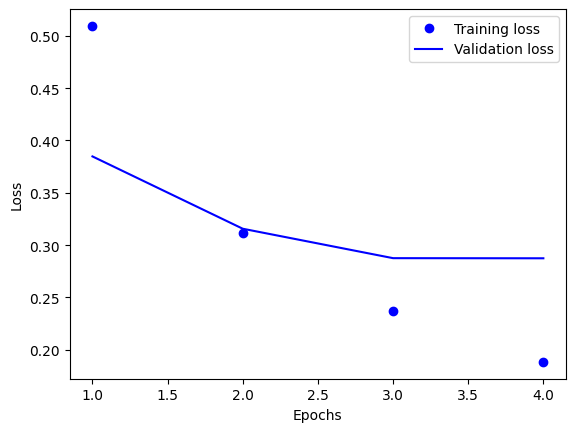

In [21]:
plt.plot(epochs, loss_values, 'bo', label='Training loss') # bo blue dots
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # b solid blue line
plt.title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

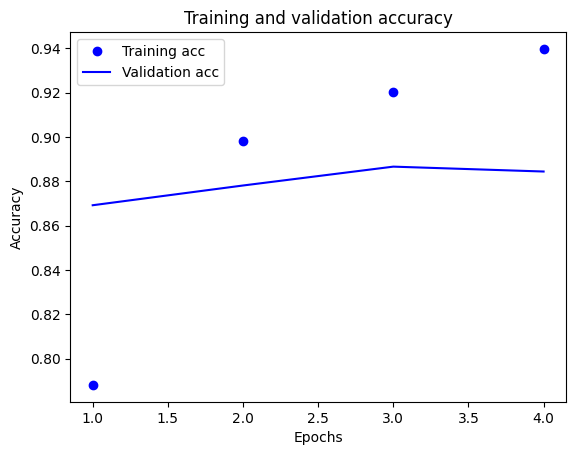

In [22]:
plt.clf() # clear figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [23]:
results = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.8731 - loss: 0.3050


In [24]:
results

[0.30588045716285706, 0.8737599849700928]

In [25]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


array([[0.22505587],
       [0.9961697 ],
       [0.8429486 ],
       ...,
       [0.05138702],
       [0.11653884],
       [0.40676498]], dtype=float32)